## Task 1: Colour Identification in Images.

### Name: Rahul Singh

### Domain: Computer Vision and IOT

#### Problem Statement: To identify the colours in the Image

In [22]:
## Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [23]:
#Installing the webcolors library
#!pip install webcolors

In [24]:
#Importing relevant libraries to convert hex code colors, rgb, color names, etc. and also the metrics 
from webcolors import rgb_to_name, hex_to_name, hex_to_rgb
import webcolors
from sklearn.metrics import mean_squared_error

<class 'numpy.ndarray'>
(3456, 5184, 3)


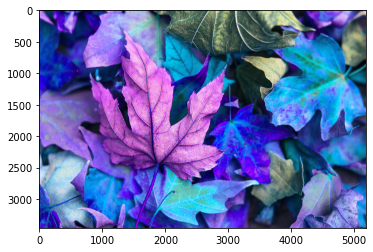

In [25]:
#Reading the image
image= cv2.imread("../input/colorimage/jeremy-thomas-O6N9RV2rzX8-unsplash.jpg")
print(type(image))
print(image.shape)
plt.imshow(image)

As we can see the color of image is looking odd. It is because OpenCV library reads the image in BGR format.

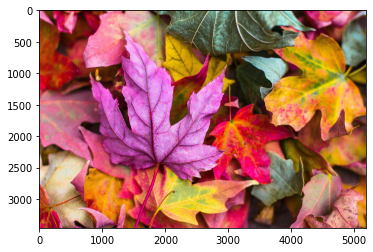

In [26]:
#Converting the image format to RGB
img= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [27]:
#Creating a function to read and convert the BGR format to RGB for images
def image_input(path):
    img= cv2.imread(path)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

#### Extracting HEX code, RGB code and name of colors present in the image

In [28]:
#Extracting HEX code from RGB format
def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#Converting the HEX code into name of color
def hex2name(color):
    h_color= rgb_to_hex(color)
    try:
        nm = hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        #print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS2_NAMES_TO_HEX.items():
            cur_clr = hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(color, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS2_NAMES_TO_HEX.items())[closest_color][0]
    return nm

In [29]:
#Function to cluster the colors present in the image and plotting a pie chart
def colors(image, no_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (220, 220), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = no_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [(ordered_colors[i]) for i in counts.keys()]
    names= [(hex2name(ordered_colors[i]), rgb_to_hex(ordered_colors[i])) for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize=(12,15))
        plt.subplot(131)
        plt.imshow(image)
        plt.subplot(133)
        plt.pie(counts.values(), labels = names, colors = hex_colors)
        plt.show()
    

    return rgb_colors

### Prediction on a random images

../input/colorimage/jeremy-thomas-O6N9RV2rzX8-unsplash.jpg


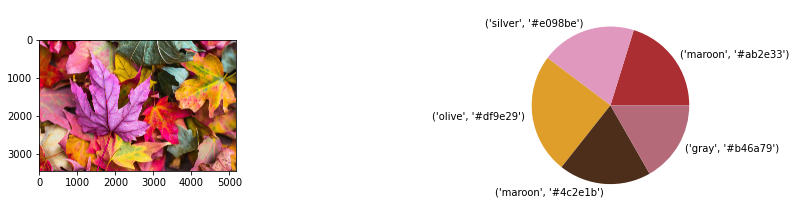

../input/flag-1/flag.jpg


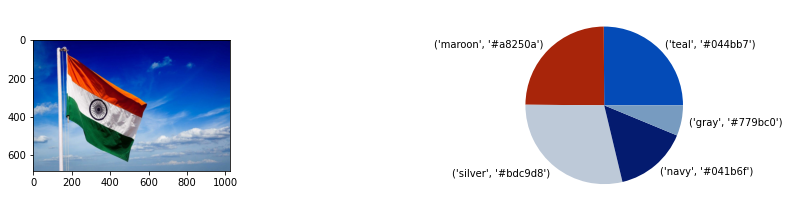

../input/plain-image/images_plain.png


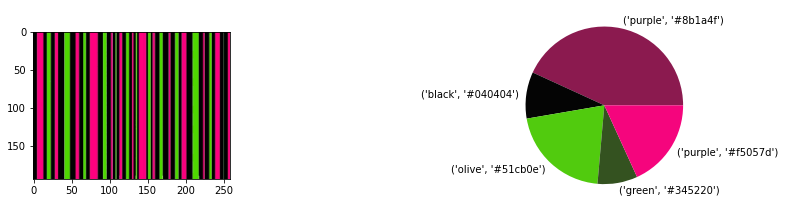

../input/red-color/red image.png


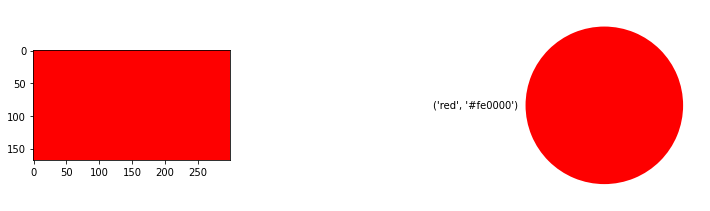

In [30]:
img1= '../input/colorimage/jeremy-thomas-O6N9RV2rzX8-unsplash.jpg'
img2= '../input/flag-1/flag.jpg'
img3= '../input/plain-image/images_plain.png'
img4= '../input/red-color/red image.png'
images= [img1, img2, img3, img4]
for i in images:
    print(i)
    colors(image_input(i), 5, True)

## Thank You